#  Transmission Frequencies

Here we will give a look to the dataset, how many measurements for each day, and estimating the transmission time for the sensor.

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utils import time_shift

import time
import os

root = '../../dataset'
t_path = ['dataset_1790789260.csv',
          'dataset_1095394822.csv',
          'dataset_479911147.csv',
          'dataset_665254893.csv',
          
        ] 

s_path = ['dataset_320725673.csv',
          'dataset_401881001.csv',
          'dataset_1992961554.csv',
          'dataset_852552682.csv',
         ] 

l_path = ['dataset_327382690.csv',
          'dataset_395223984.csv',
          'dataset_1999618571.csv',
         ]

In [2]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

The data inside datasets have this form:
<center>  < identifier, timestamp, value > </center>

We will focus on intervals of timestamps.

In [3]:
df = pd.read_csv(os.path.join(root, l_path[0]), header = None)
ts = df[1] #.values

first = ts.iloc[0].astype('datetime64[ms]')
last = ts.iloc[-1].astype('datetime64[ms]')

print(ts.iloc[0], first)
print(ts.iloc[-1], last)

1504965327518 2017-09-09T13:55:27.518
1526975361478 2018-05-22T07:49:21.478


The datetime is datetime.datetime(year, month, day, hour, minute, second, microsecond)

For this specific data:
1. The First ts is 2017-9-9, a Saturday
2. The Last ts is 2018-5-22, a Tuesday

Now we look the frequency of data in different granularity

In [4]:
def get_frequencies(df, delta_size = 1, delta_type = 'D'):
    """
    :param df:
        dataframe on which perfrom computation.
        must be a dataframe with a single column with the timestamp
    :param delta_size:
        size of the time interval on which compute the frequencies
    :param delta_type:
        type of the time interval, the admissible values are the numpy Datetime Units 
    :return:
        dataframe containing:
            day, num measurements, first_ts (within the interval), last_ts (within the interval)
    """
    
    
    first_ts = df.iloc[0]
    last_ts = df.iloc[-1]
    
    delta = np.timedelta64(delta_size,delta_type)
    
    first_delta = first_ts.astype('datetime64[ms]').astype('datetime64['+delta_type+']')
    last_delta = last_ts.astype('datetime64[ms]').astype('datetime64['+delta_type+']') + delta
    
    current_delta = first_delta
    i = 0
    
    measures = dict()
    
    while current_delta <= last_delta and i < len(df):
        next_delta = current_delta + delta
        measures[current_delta] = 0
        fod = df.iloc[i]
        
        while (i< len(df)) and (df.iloc[i].astype('datetime64[ms]') < next_delta):
            measures[current_delta] += 1
            i = i+1
        
        lod = df.iloc[i-1]
        measures[current_delta] = (measures[current_delta], fod, lod)
        current_delta = next_delta
        
    days = []
    num_measurements = []
    first = []
    last = []
    
    for k in measures:
        if measures[k][0] > 0:
            days.append(k.astype('datetime64[ms]'))
            num_measurements.append(measures[k][0])
            first.append(measures[k][1].astype('datetime64[ms]'))
            last.append(measures[k][2].astype('datetime64[ms]'))
            
    dt = np.array([days, num_measurements, first, last])
    return pd.DataFrame(dt.transpose(), columns = ['time interval', 'num measurements', 'first ts', 'last ts']) 

## Daily measurements

Here for each node, we'll plot the number of measurements registered for each day of transmission.
In the bar plot there is a visualization of the number of measurements for each day.
Below the plot there is a discursive print were for each node is written in this order:
1. begin of the time interval (day) in which there are measurement
2. number of measurement for the given day
3. first timestamp for the given day
4. last timestamp for the given day

<IPython.core.display.Javascript object>


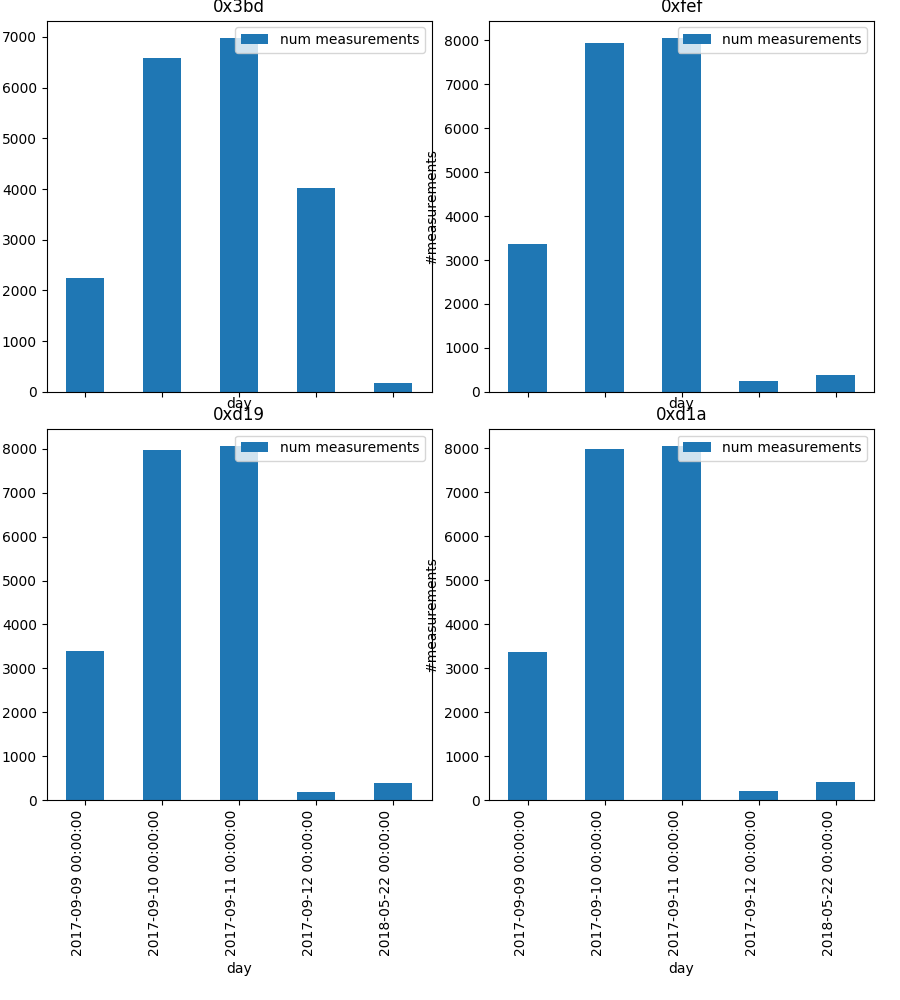

0x3bd
             time interval num measurements                 first ts                  last ts
0  2017-09-09T00:00:00.000             2252  2017-09-09T13:55:27.518  2017-09-09T23:59:49.346
1  2017-09-10T00:00:00.000             6577  2017-09-10T00:00:09.567  2017-09-10T23:59:59.107
2  2017-09-11T00:00:00.000             6974  2017-09-11T00:00:19.315  2017-09-11T23:59:50.392
3  2017-09-12T00:00:00.000             4014  2017-09-12T00:00:00.497  2017-09-12T13:07:39.707
4  2018-05-22T00:00:00.000              183  2018-05-22T06:40:26.208  2018-05-22T07:49:21.478
0xfef
             time interval num measurements                 first ts                  last ts
0  2017-09-09T00:00:00.000             3375  2017-09-09T13:55:27.773  2017-09-09T23:59:52.099
1  2017-09-10T00:00:00.000             7943  2017-09-10T00:00:02.177  2017-09-10T23:59:54.871
2  2017-09-11T00:00:00.000             8044  2017-09-11T00:00:04.918  2017-09-11T23:59:57.735
3  2017-09-12T00:00:00.000              246  201

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(nrows = 2, ncols = 2)

fig.tight_layout()
fig.autofmt_xdate()
#fig.subplots_adjust(left = 0.1, bottom=0.5)

i = 0
j = 0

print('='*93)

for path in t_path:
    t = os.path.join(root, path)
    df = pd.read_csv(t, header=None)
    
    x = get_frequencies(df[1])
    x.plot(ax=ax[i][j], x=0, y=[1], kind='bar', title = df.iloc[0,0].split('/')[-2])
    
    ax[i][j].set_xlabel('day')
    ax[i][j].set_ylabel('#measurements')
    
    j = j+1
    if (j % 2 == 0):
        j = 0
        i = i+1
    
    print(df.iloc[0,0].split('/')[-2])
    print(x.to_string())
    print('='*93)

From the datasets, the only days with effective measurements are 5:
* 2017-09-09, Saturday - 10of mearuements (evening)
* 2017-09-10, Sunday - 24h of measurements
* 2017-09-11, Monday - 24h of measurements
* 2017-09-12, Tuesday - 1/2h of measurements (night only), in one case 13 hours.
* 2018-05-22, Tuesday - 1h of mesurements (morning)

## Plots of transmission frequencies

We will consider as transmission time of a measurements.
As transmission time of a measurement we will consider the time of the measurement from the last measurement recived.
So in pratice we take as transmission time the timestamp of the current measurement and we subtract the timestamp of the last measurement for the same sensor.

Let be $ts_i$ the timestamp of the i-th measurement, then the transmission time of the measurement i ($tt_i$)
<center>  $tt_i = ts_i - ts_{i-1}$ </center>

In [6]:
def count_intervals(a, to_sec = False):
    tmp = {}
    for x in a:
        x = int(round(x)) if to_sec else x
        tmp[x] = tmp.get(x, 0) + 1
    t = []
    for k in tmp:
        t.append((k, tmp[k]))
    t.sort()
    X = []
    Y = []
    for x, y in t:
        X.append(x)
        Y.append(y)
    return X, Y


def plot_bars(root, path_list, first_datetime, last_datetime, ax):
    
    fts = first_datetime.astype('int64')
    lts = last_datetime.astype('int64')
    
    df_list = []
    
    for path in path_list:
        df = pd.read_csv(os.path.join(root, path), header = None)
        df = time_shift(df)
        df = df[(df[1]//1000 >= fts) & (df[1]//1000 < lts)]    
        
        x = df.iloc[:,3].values
        
        info = df.iloc[0,0].split('/')
        
        node = info[1] + ',' + info[2]
        
        x, y = count_intervals(x)
        
        curr_df = pd.DataFrame(y, x, columns = [node])
        
        df_list.append(curr_df)
    
    df = df_list[0]
    for x in df_list[1:]:
        df = df.combine_first(x)
    
    df = df.fillna(0)
    
    df.plot(ax = ax, kind='bar')
    ax.set_title("from" +str(first_datetime) + " to " + str(last_datetime))
    ax.set_xlabel('time-steps')
    ax.set_ylabel('# of measurements')
    ax.set_yscale('log')
    ax.grid()
    ax.legend()

We will consider different hours from different days.
In this way we will get an idea of the transmission rate of the sensors. 

We will proceed in this way:

1. First we will consider the sensors data from the Tuesday, since more or less all the nodes cover that period with simila number of measurements 
2. Then we will move to the two days with most data - Monday and Sunday. 

For the latters we will first compute the hourly frequences in order to decide what are the intervals we should focus on.

## Tuesday
### Morning

The data from this day is already on a single hour (roughly), we can start by analyzing this one directly 

<IPython.core.display.Javascript object>


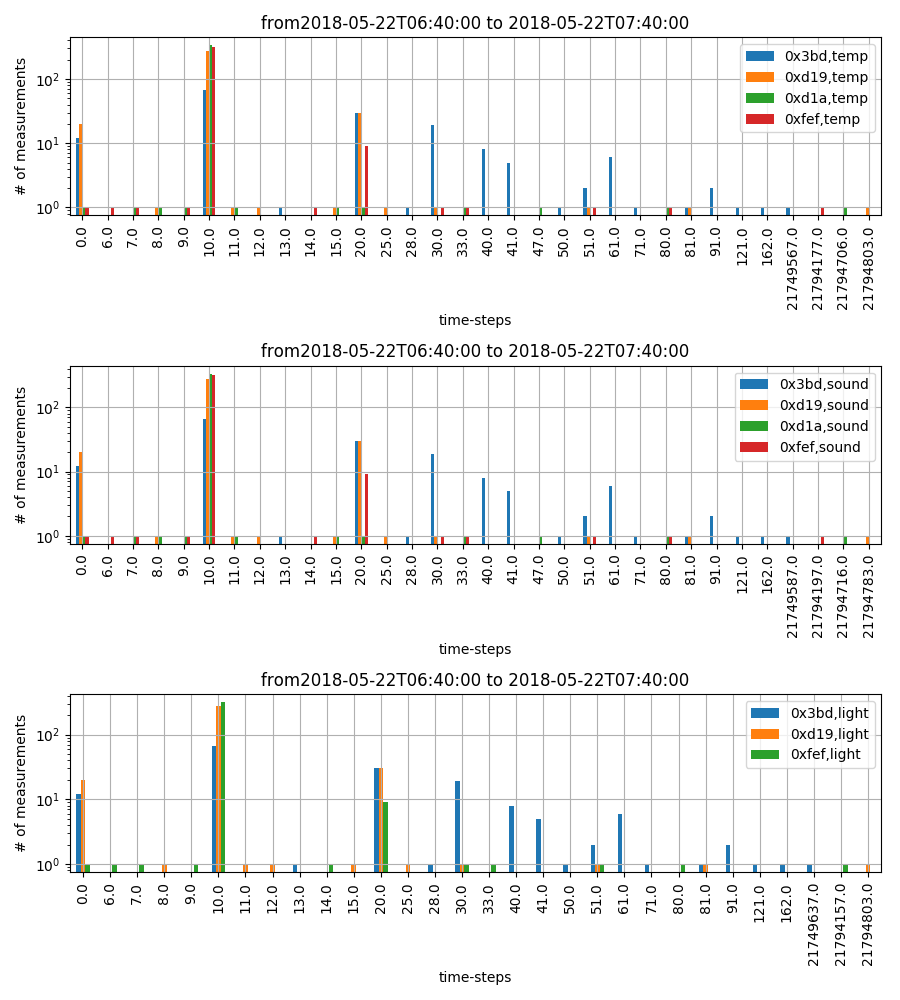

In [7]:
fts = np.datetime64('2018-05-22T06:40:00')
lts = np.datetime64('2018-05-22T07:40:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Tuesday Morning')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()

The plot shows the transmission frequencies of the same type of sensors within the specified interval of time.
- On the x axis there are the transmission times registered from the measurements
- On the y axis there are the number of measurements having the specified transmission time 
> The last three measurements with high transmission time are due to the fact that in the dataset there is a hole that goes from 2017-09-12 to 2018-05-22.

Each plot compare a different type of sensors. In particular as will be shown later, sensors in the same node have same plot of frequencies.

All the data for 0xd19, 0xd1a and 0xfef are mostly within 10 seconds, with few measurements dalyed to 20 seconds or below 10 second. 

In one case for sensors of node 0x3bd, the transmissions are mostly dalayed, but the majority is still within 10 seconds. 

## Sunday

The first thing I'll do is to plot number of measurements per hour.

> There are some hours we have to focus on?

As for the days, we will produce a bar for each node with the number of measurements of each hour.
Then below there is a discorsive print with more information.


<IPython.core.display.Javascript object>


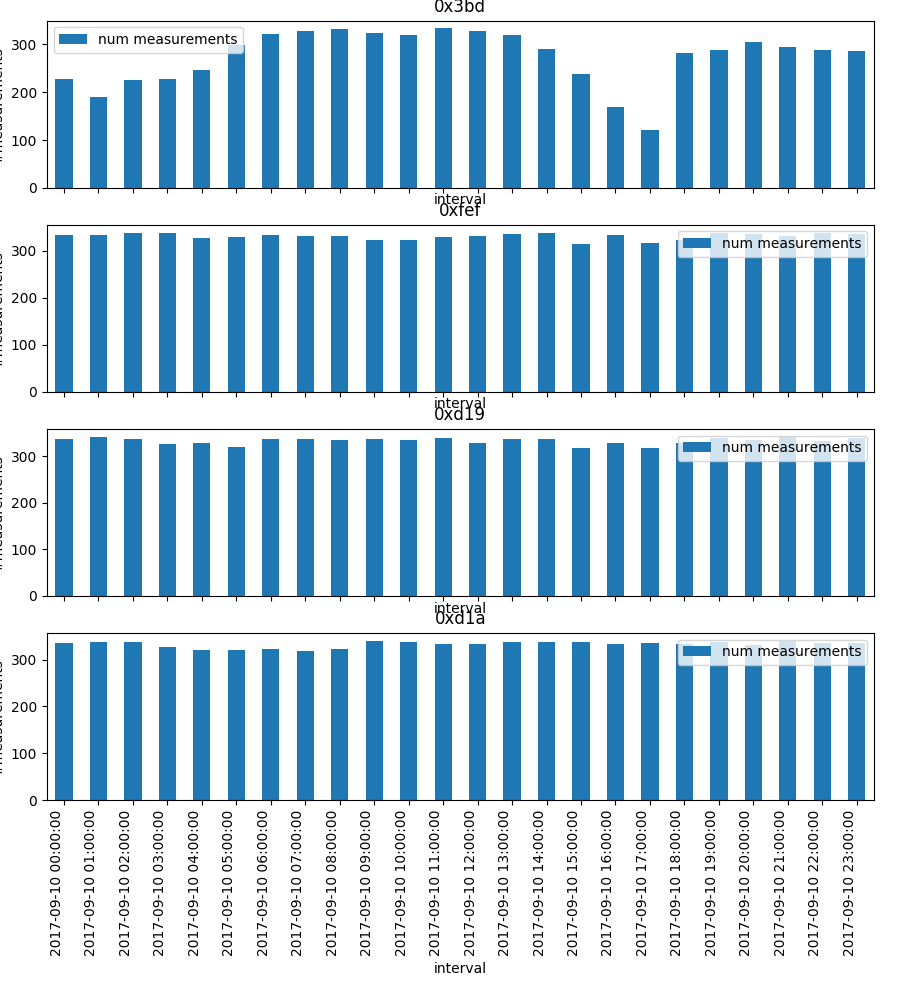

0x3bd
              time interval num measurements                 first ts                  last ts
0   2017-09-10T00:00:00.000              227  2017-09-10T00:00:09.567  2017-09-10T00:59:57.254
1   2017-09-10T01:00:00.000              190  2017-09-10T01:00:57.897  2017-09-10T01:59:24.432
2   2017-09-10T02:00:00.000              226  2017-09-10T02:00:14.971  2017-09-10T02:59:52.395
3   2017-09-10T03:00:00.000              227  2017-09-10T03:00:02.499  2017-09-10T03:59:19.860
4   2017-09-10T04:00:00.000              246  2017-09-10T04:00:00.281  2017-09-10T04:59:37.873
5   2017-09-10T05:00:00.000              298  2017-09-10T05:00:08.185  2017-09-10T05:59:56.314
6   2017-09-10T06:00:00.000              321  2017-09-10T06:00:16.523  2017-09-10T06:59:44.906
7   2017-09-10T07:00:00.000              328  2017-09-10T07:00:05.094  2017-09-10T07:59:53.962
8   2017-09-10T08:00:00.000              332  2017-09-10T08:00:04.085  2017-09-10T08:59:42.760
9   2017-09-10T09:00:00.000              324

In [8]:
fts = np.datetime64('2017-09-10').astype('datetime64[ms]').astype('int64')
lts = np.datetime64('2017-09-11').astype('datetime64[ms]').astype('int64')

fig, ax = plt.subplots(nrows = 4)
fig.tight_layout()
fig.autofmt_xdate()

i = 0

print("="*94)
for path in t_path:
    df = pd.read_csv(os.path.join(root, path), header = None)   
    node = df.at[0,0].split('/')[-2]
    df = df[(df[1] >= fts) & (df[1] < lts)]
    
    x = get_frequencies(df[1], delta_size = 1, delta_type = 'h')
    x.plot(ax=ax[i], x=0, y=[1], kind='bar', title = node)
    
    ax[i].set_xlabel('interval')
    ax[i].set_ylabel('#measurements')
    
    i = i+1
    print(node)
    print(x.to_string())
    print("="*94)

We have almost the same number of measurements per hour for each sensors.
Except one node 0x3bd, for which the data transmitted is much less:

In particular in the following intervalg get a noticeable drop:

> * 1:00-2:00
> * 16:00-17:00
> * 17:00-18:00

(This is true also for the other kind of sensors)

### Sunday Night - Early Morning

The first interval chosen is one where the node 0x3bd has more delays.

<IPython.core.display.Javascript object>


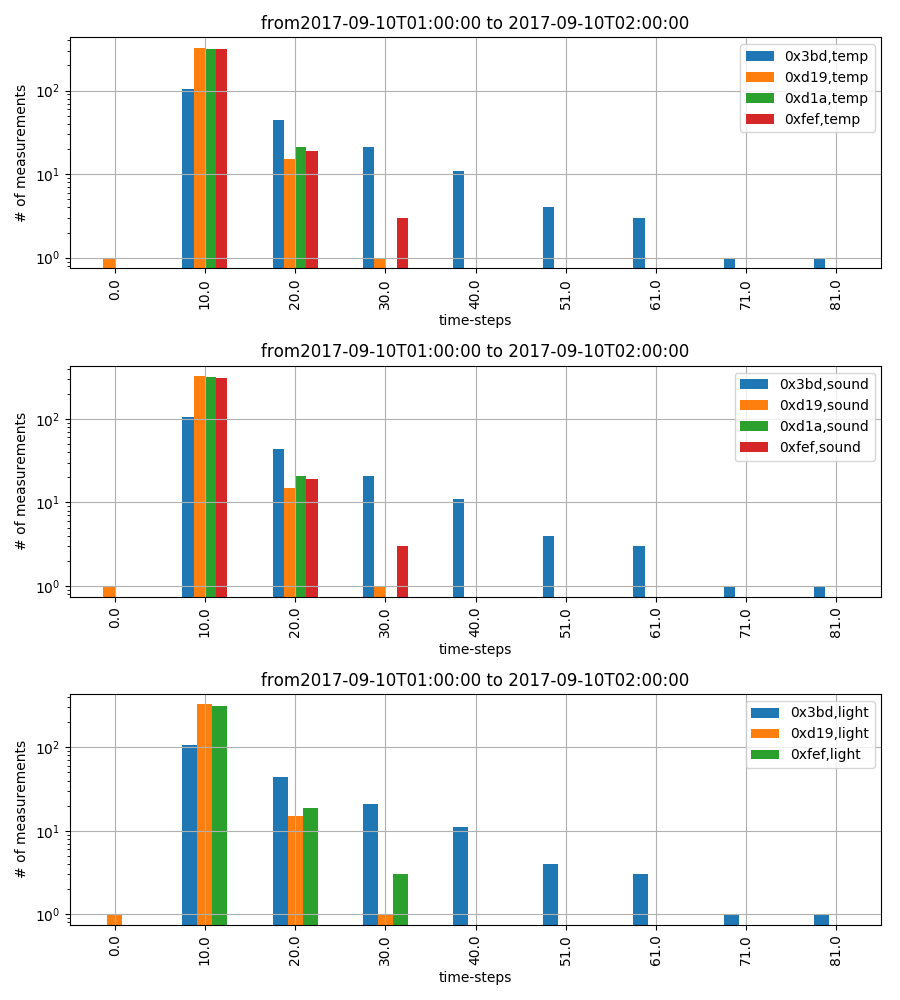

In [9]:
fts = np.datetime64('2017-09-10T01:00:00')
lts = np.datetime64('2017-09-10T02:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Sunday Night - Early Morning')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()


### Sunday Morning

For morning hour, we will consider an interval close to the one already seen in the previous case 7:00-8:00.

As the previous plot suggest, the transmission time should be all aroud 10s since in every node, the bar is around 300-340 measurements

<IPython.core.display.Javascript object>


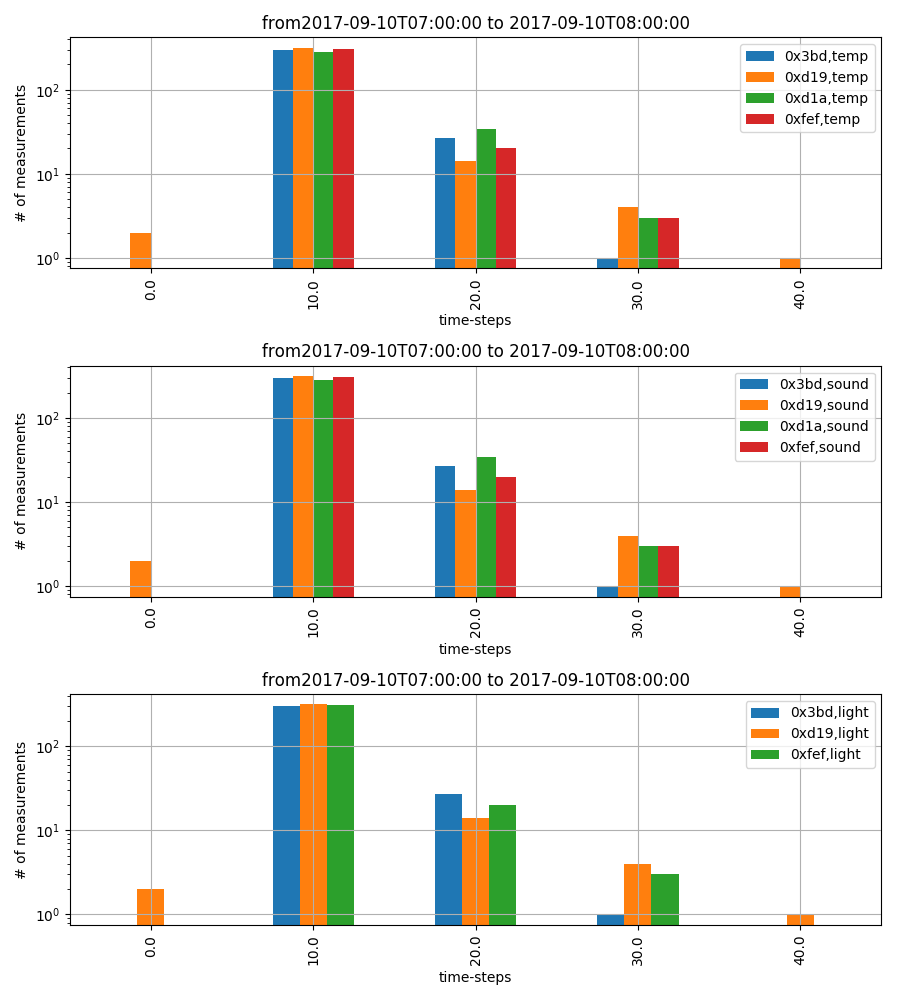

In [10]:
fts = np.datetime64('2017-09-10T07:00:00')
lts = np.datetime64('2017-09-10T08:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Sunday Morning')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()

For all sensors, the measurements are largely withn 10 seconds, only in few cases we have a delay over 20 seconds.

### Sunday Evening

Here we'll consider the time period between 16:00-17:00 and 17:00-18:00  which are the hour with the most losses for node 0x3bd.

<IPython.core.display.Javascript object>


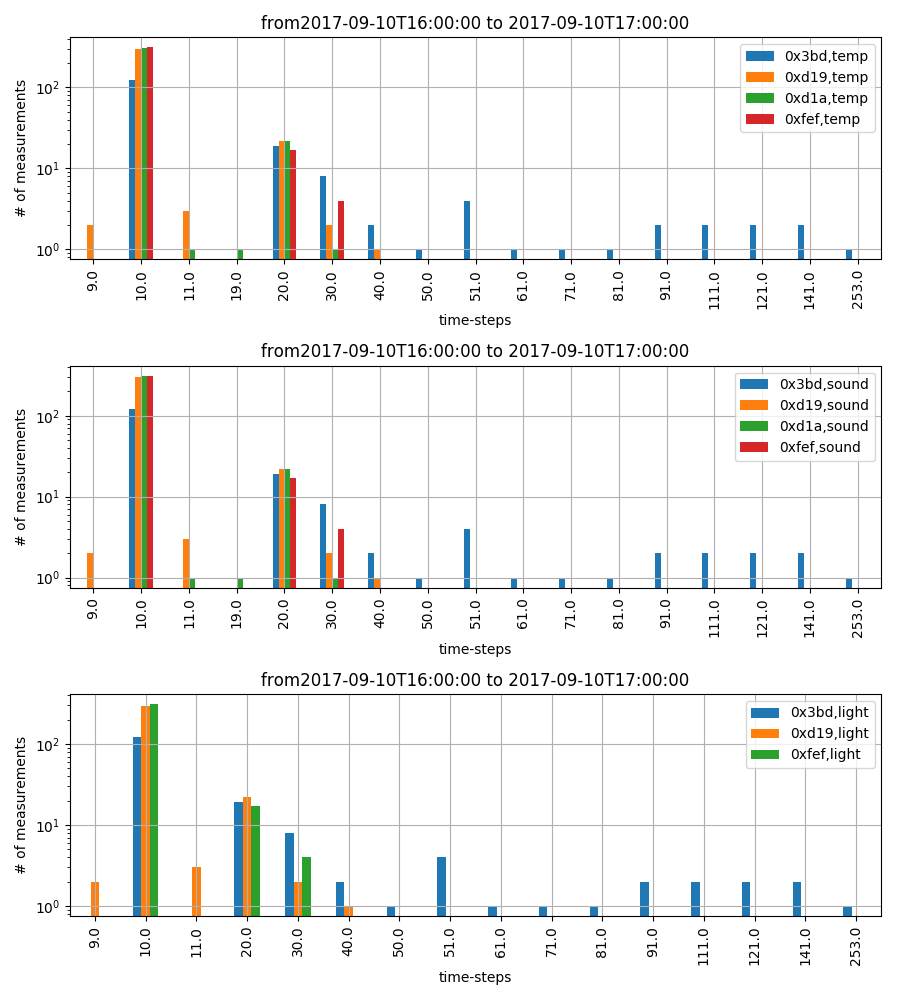

In [11]:
fts = np.datetime64('2017-09-10T16:00:00')
lts = np.datetime64('2017-09-10T17:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Sunday Evening-1')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


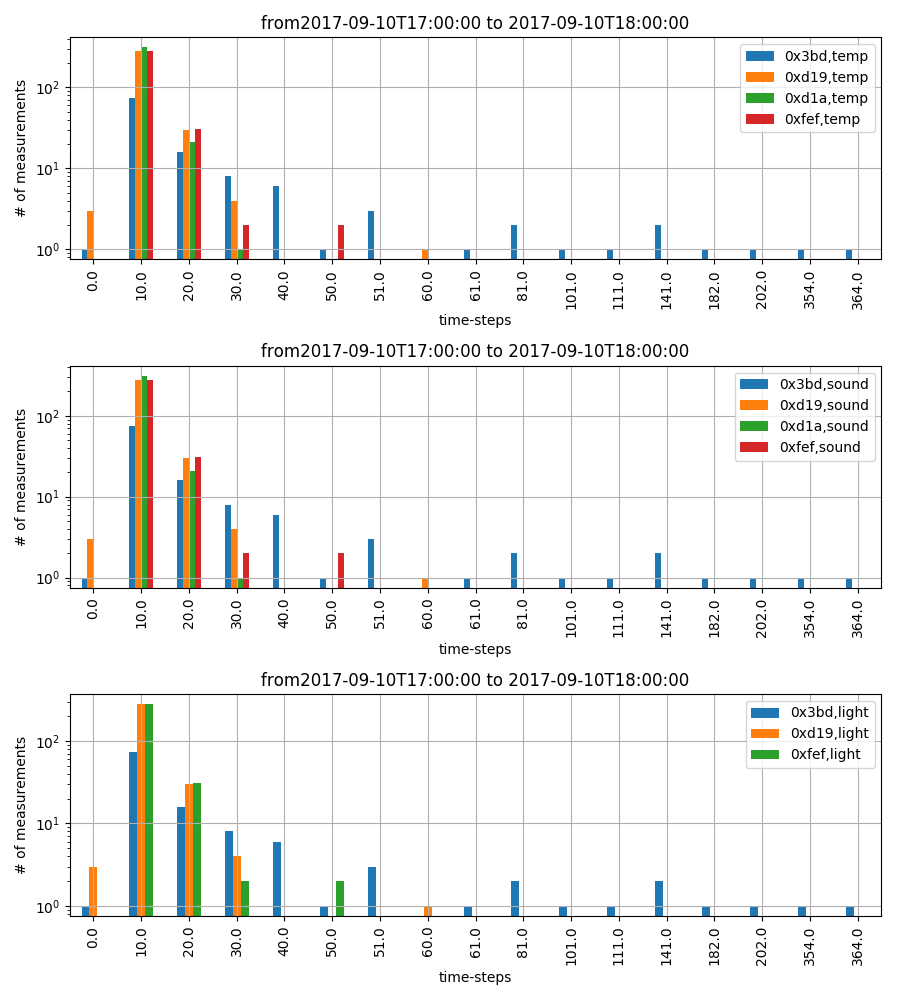

In [12]:
fts = np.datetime64('2017-09-10T17:00:00')
lts = np.datetime64('2017-09-10T18:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Sunday Evening-2')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()

The sensor of node 0x3bd shows a lot of delays up to 6 minutes.
The other are with the majority within 10-20 seconds, in few cases there are measurements that are dalyed up to one minutes, but they are few dozen.

### Sunday Night

<IPython.core.display.Javascript object>


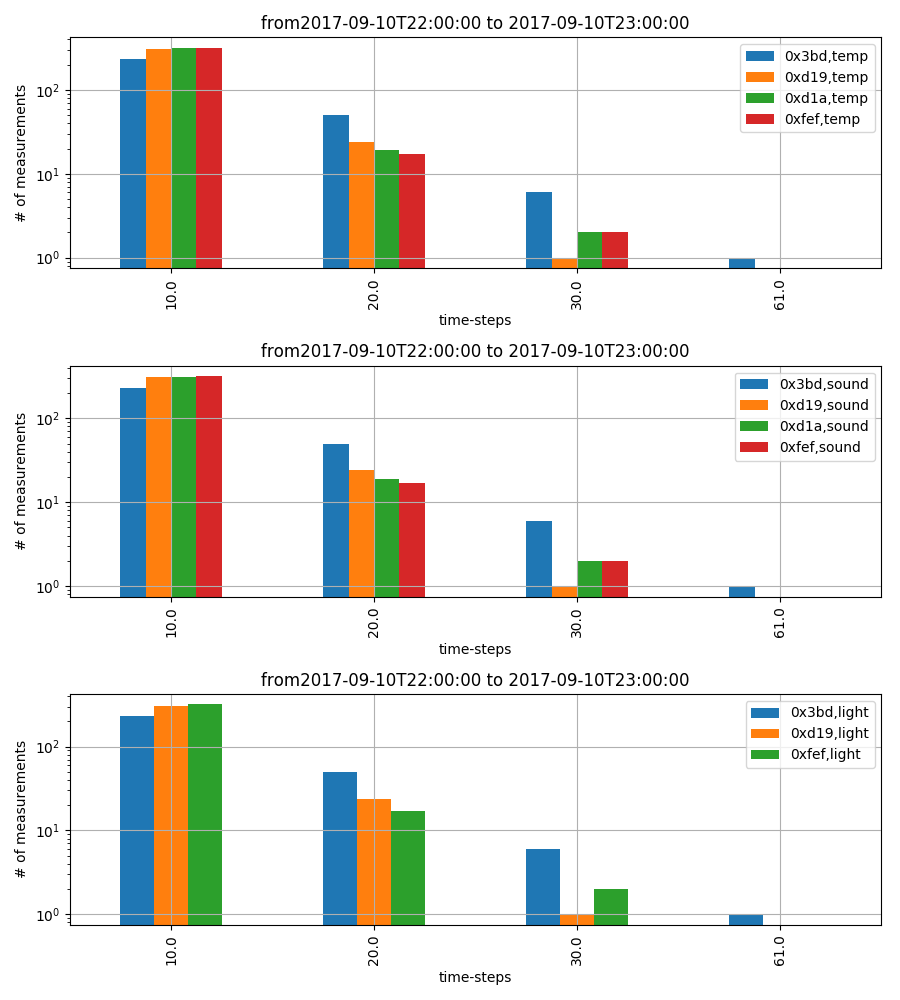

In [13]:
fts = np.datetime64('2017-09-10T22:00:00')
lts = np.datetime64('2017-09-10T23:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Sunday Night')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()

In all the sensors, the majority is within 10s. This behavior was expected since the wi-fi network should be free in the interval chosen. 
Only the sensors in 0x3bd show more delays than the other nodes

## Monday

<IPython.core.display.Javascript object>


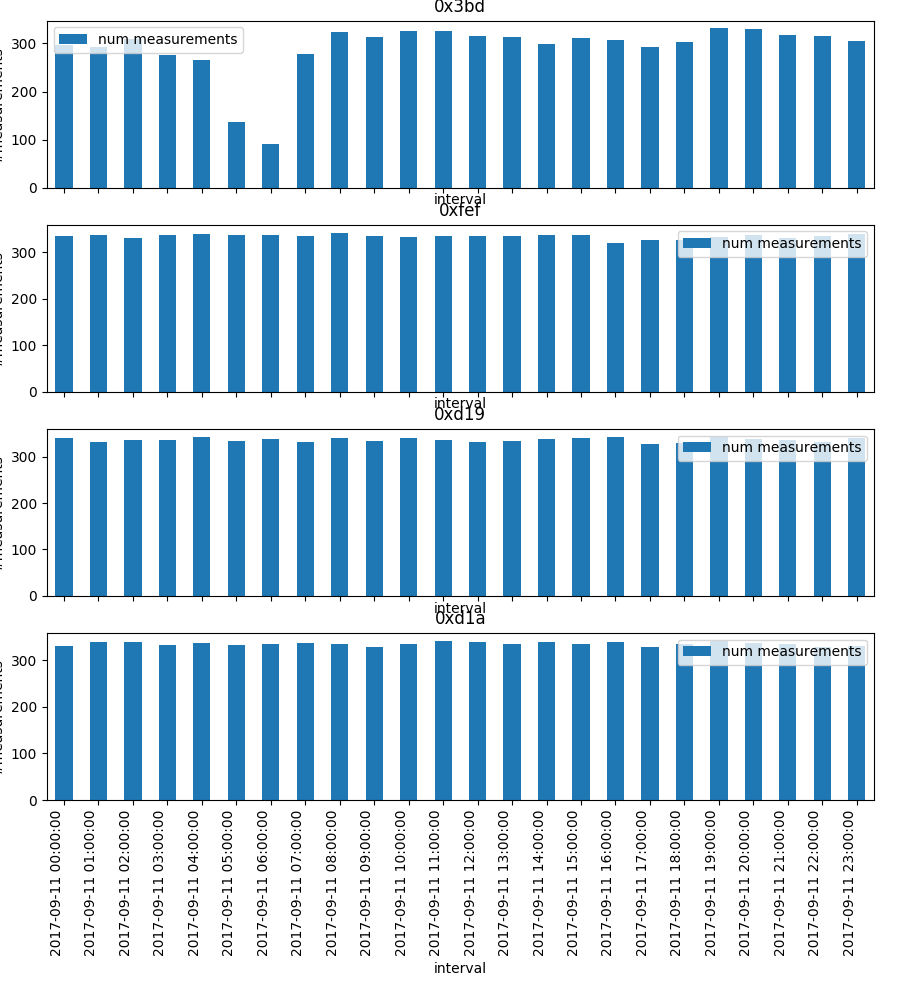

0x3bd
              time interval num measurements                 first ts                  last ts
0   2017-09-11T00:00:00.000              297  2017-09-11T00:00:19.315  2017-09-11T00:59:57.299
1   2017-09-11T01:00:00.000              292  2017-09-11T01:00:17.508  2017-09-11T01:59:55.327
2   2017-09-11T02:00:00.000              310  2017-09-11T02:00:05.426  2017-09-11T02:59:53.701
3   2017-09-11T03:00:00.000              276  2017-09-11T03:00:03.806  2017-09-11T03:59:41.775
4   2017-09-11T04:00:00.000              265  2017-09-11T04:00:02.008  2017-09-11T04:59:39.854
5   2017-09-11T05:00:00.000              137  2017-09-11T05:00:00.006  2017-09-11T05:57:56.349
6   2017-09-11T06:00:00.000               92  2017-09-11T06:00:17.826  2017-09-11T06:59:04.442
7   2017-09-11T07:00:00.000              278  2017-09-11T07:00:05.047  2017-09-11T07:59:53.288
8   2017-09-11T08:00:00.000              324  2017-09-11T08:00:03.778  2017-09-11T08:59:52.026
9   2017-09-11T09:00:00.000              313

In [14]:
fts = np.datetime64('2017-09-11').astype('datetime64[ms]').astype('int64')
lts = np.datetime64('2017-09-12').astype('datetime64[ms]').astype('int64')

fig, ax = plt.subplots(nrows = 4)
fig.tight_layout()
fig.autofmt_xdate()

i = 0

print("="*94)
for path in t_path:
    df = pd.read_csv(os.path.join(root, path), header = None)   
    node = df.at[0,0].split('/')[-2]
    df = df[(df[1] >= fts) & (df[1] < lts)]
    
    x = get_frequencies(df[1], delta_size = 1, delta_type = 'h')
    x.plot(ax=ax[i], x=0, y=[1], kind='bar', title = node)
    
    ax[i].set_xlabel('interval')
    ax[i].set_ylabel('#measurements')
    
    i = i+1
    print(node)
    print(x.to_string())
    print("="*94)

As the previous case the node 0x3db is the one with most missing transmissions.
In particular in this day th hours with more delays are the hours between 5:00-8:00

### Monday Night - early morining 

<IPython.core.display.Javascript object>


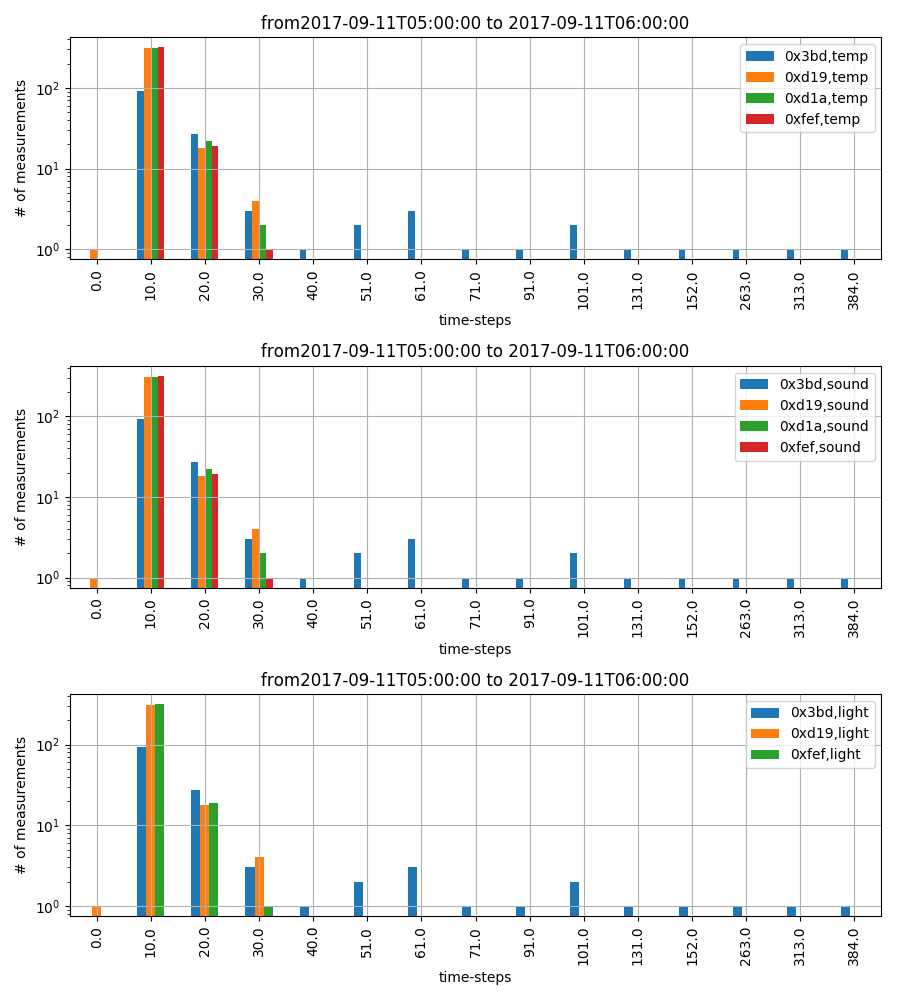

In [15]:
fts = np.datetime64('2017-09-11T05:00:00')
lts = np.datetime64('2017-09-11T06:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Monday Night/Morning')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()

### Monday Morning 
I will consider the same time interval 7:00-8:00, which is also one of the one with most missing values.

<IPython.core.display.Javascript object>


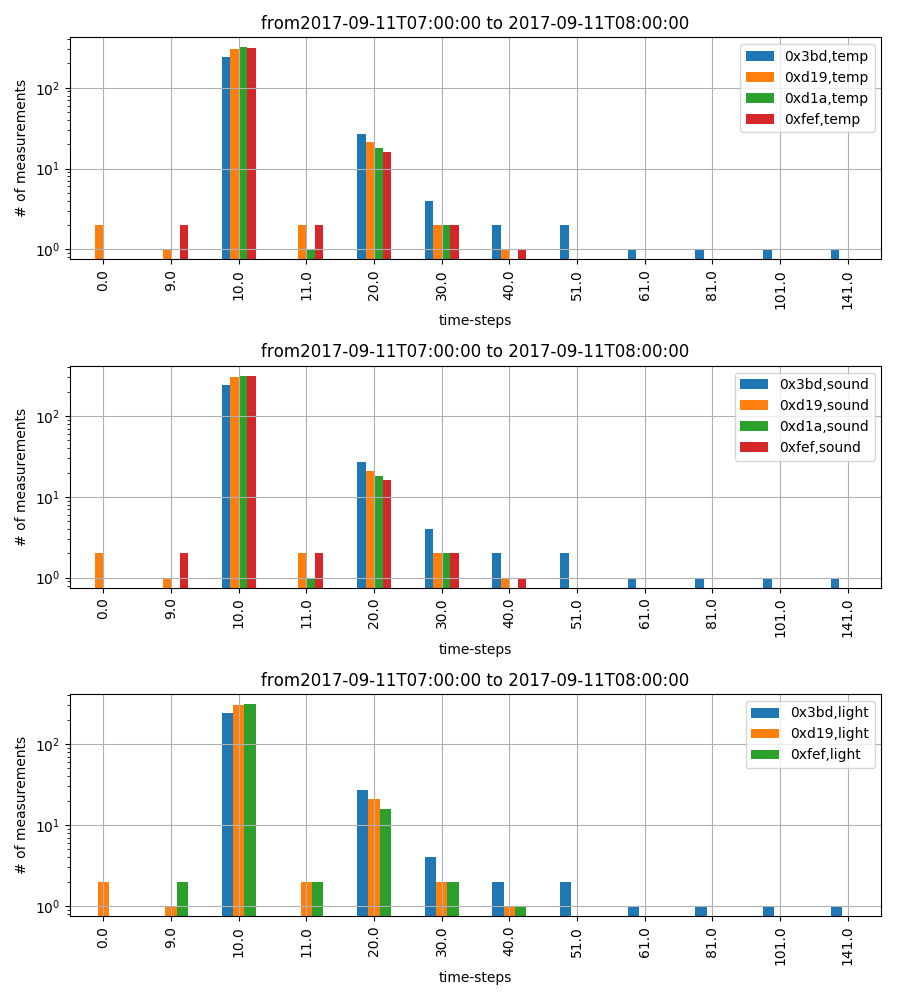

In [22]:
fts = np.datetime64('2017-09-11T07:00:00')
lts = np.datetime64('2017-09-11T08:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Monday Morning')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()

The sensors with few transmission is the same of Sunday Evening, the transmissions go largely over 50s.

### Monday Evening

<IPython.core.display.Javascript object>


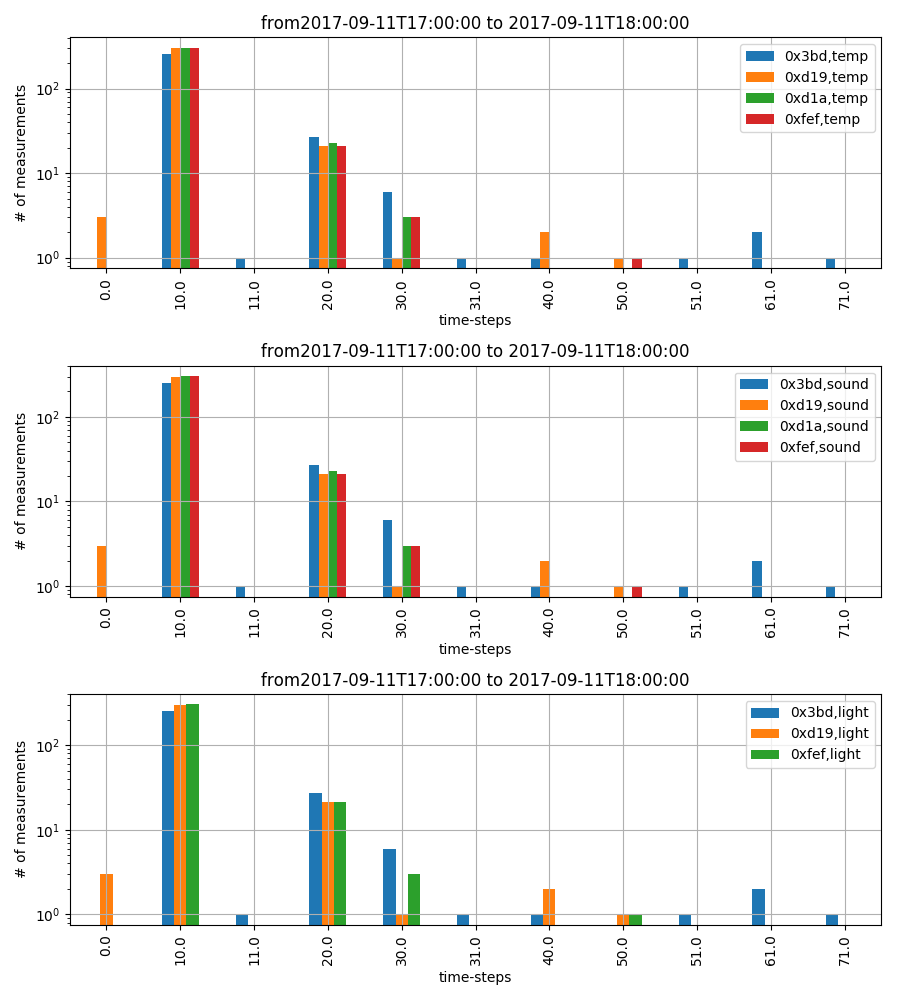

In [17]:
fts = np.datetime64('2017-09-11T17:00:00')
lts = np.datetime64('2017-09-11T18:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Monday Evening')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()

In the same day, the same sensor returned to work with transmission mostly within 10s. 

### Monday Night

<IPython.core.display.Javascript object>


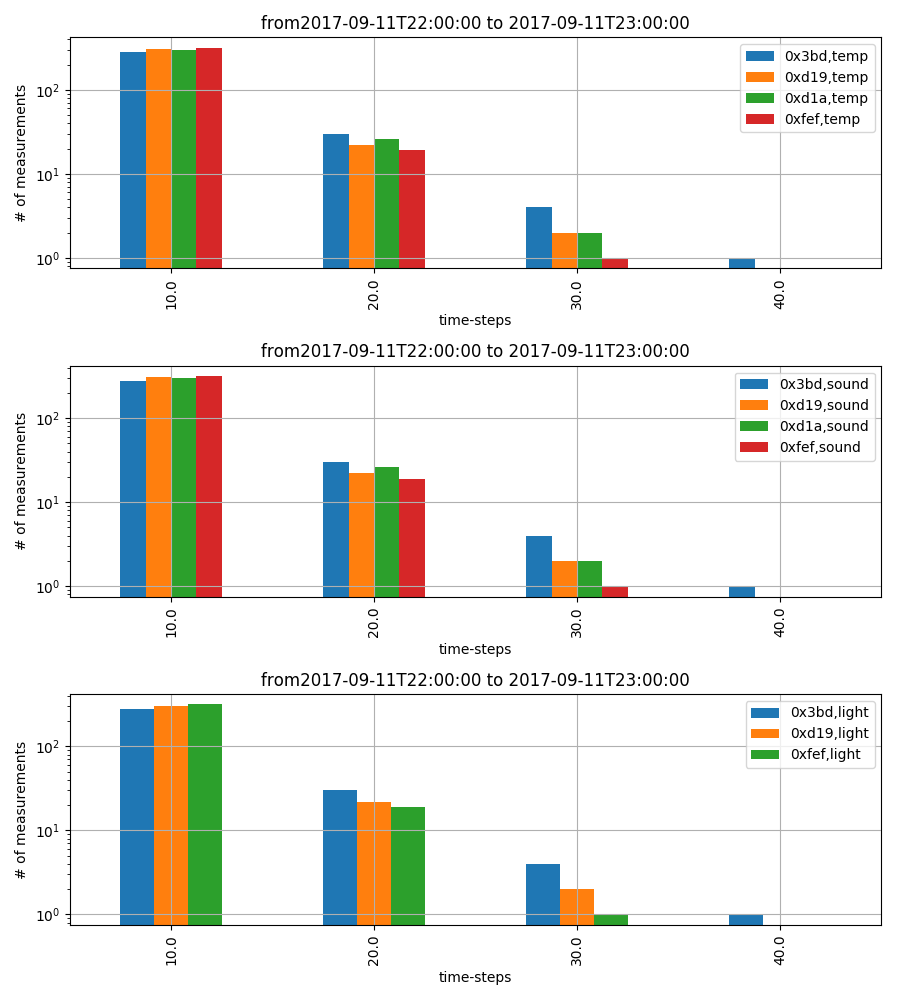

In [23]:
fts = np.datetime64('2017-09-11T22:00:00')
lts = np.datetime64('2017-09-11T23:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1, num = 'Monday Night')
plot_bars(root, t_path, fts, lts, axes[0])
plot_bars(root, s_path, fts, lts, axes[1])
plot_bars(root, l_path, fts, lts, axes[2])
fig.tight_layout()
plt.show()

All the sensors works with almost the same transmission rate.

# Comparing same node sensors 

Looking at the number of measurements per hour of all the sensors, there are some similar pattern.
How close are them?

## Tuesday
### Morning

<IPython.core.display.Javascript object>


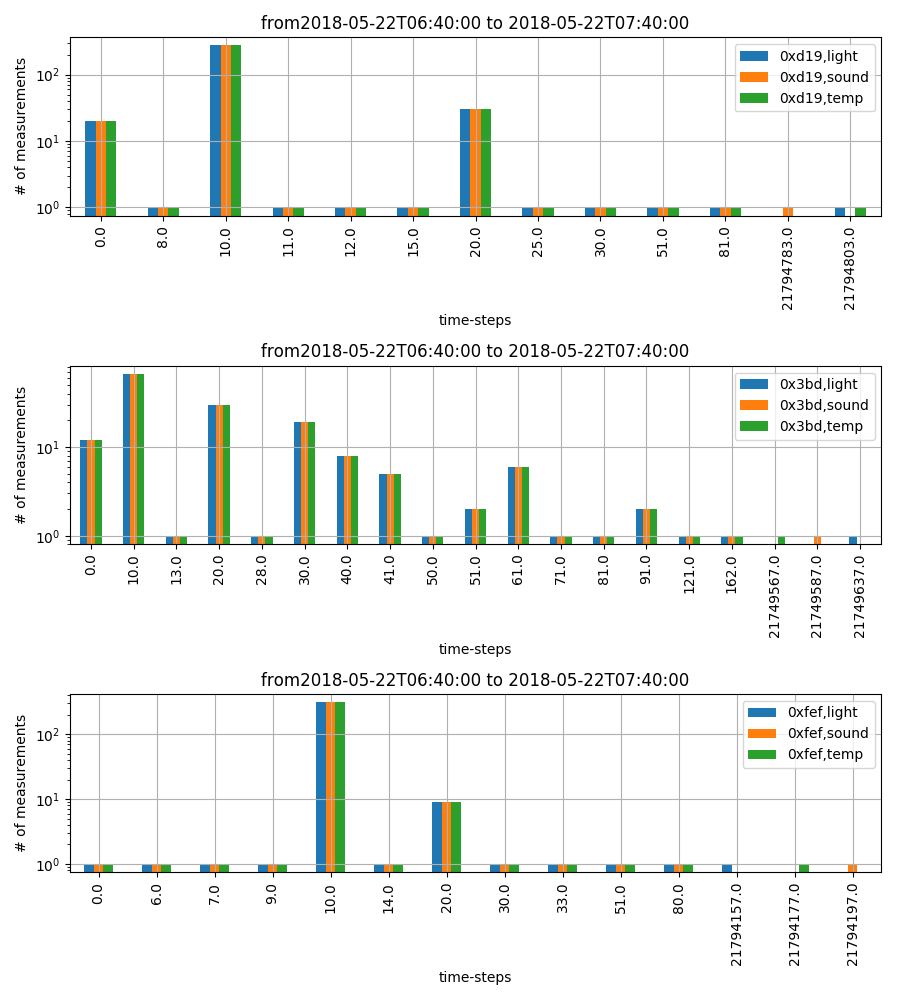

In [19]:
fts = np.datetime64('2018-05-22T06:40:00')
lts = np.datetime64('2018-05-22T07:40:00')

fig, axes = plt.subplots(nrows=3, ncols=1)
plot_bars(root, [t_path[2], s_path[2], l_path[2]], fts, lts, axes[0])
plot_bars(root, [t_path[0], s_path[0], l_path[0]], fts, lts, axes[1])
plot_bars(root, [t_path[1], s_path[1], l_path[1]], fts, lts, axes[2])
fig.tight_layout()
plt.show()

## Sunday
### Evening

<IPython.core.display.Javascript object>


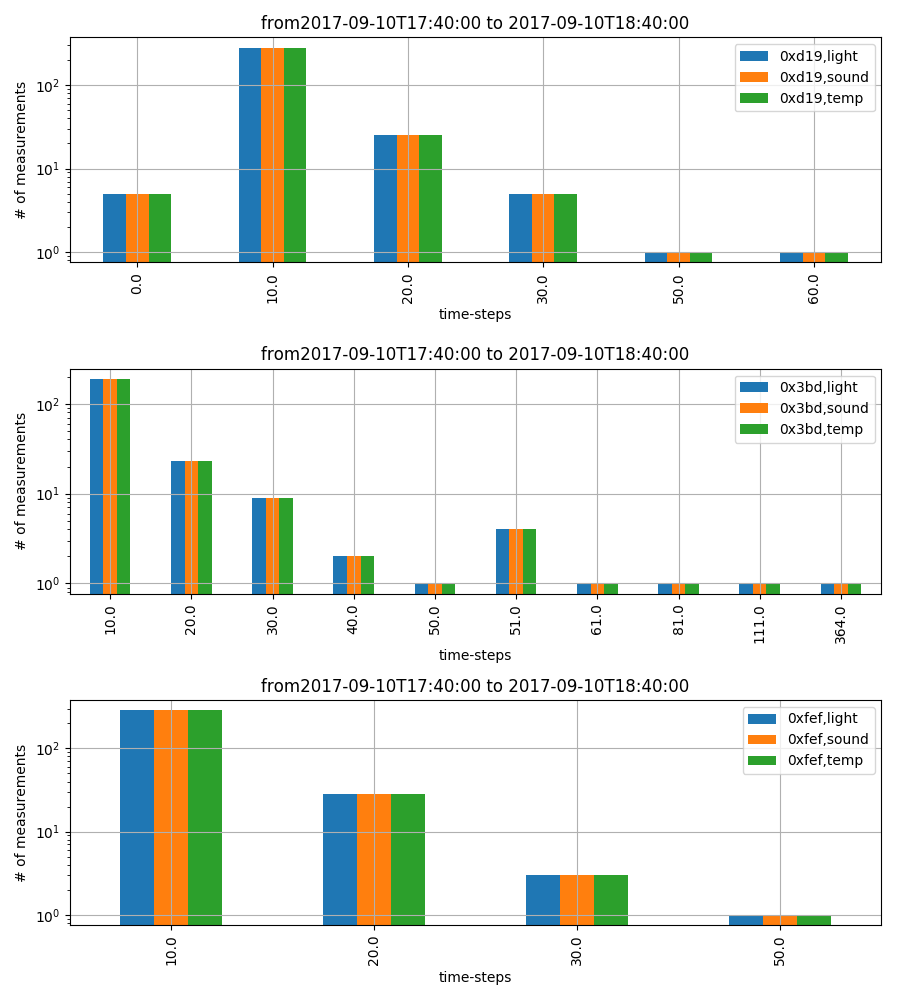

In [20]:
fts = np.datetime64('2017-09-10T17:40:00')
lts = np.datetime64('2017-09-10T18:40:00')

fig, axes = plt.subplots(nrows=3, ncols=1)
plot_bars(root, [t_path[2], s_path[2], l_path[2]], fts, lts, axes[0])
plot_bars(root, [t_path[0], s_path[0], l_path[0]], fts, lts, axes[1])
plot_bars(root, [t_path[1], s_path[1], l_path[1]], fts, lts, axes[2])
fig.tight_layout()
plt.show()

## Monday
### Morning

<IPython.core.display.Javascript object>


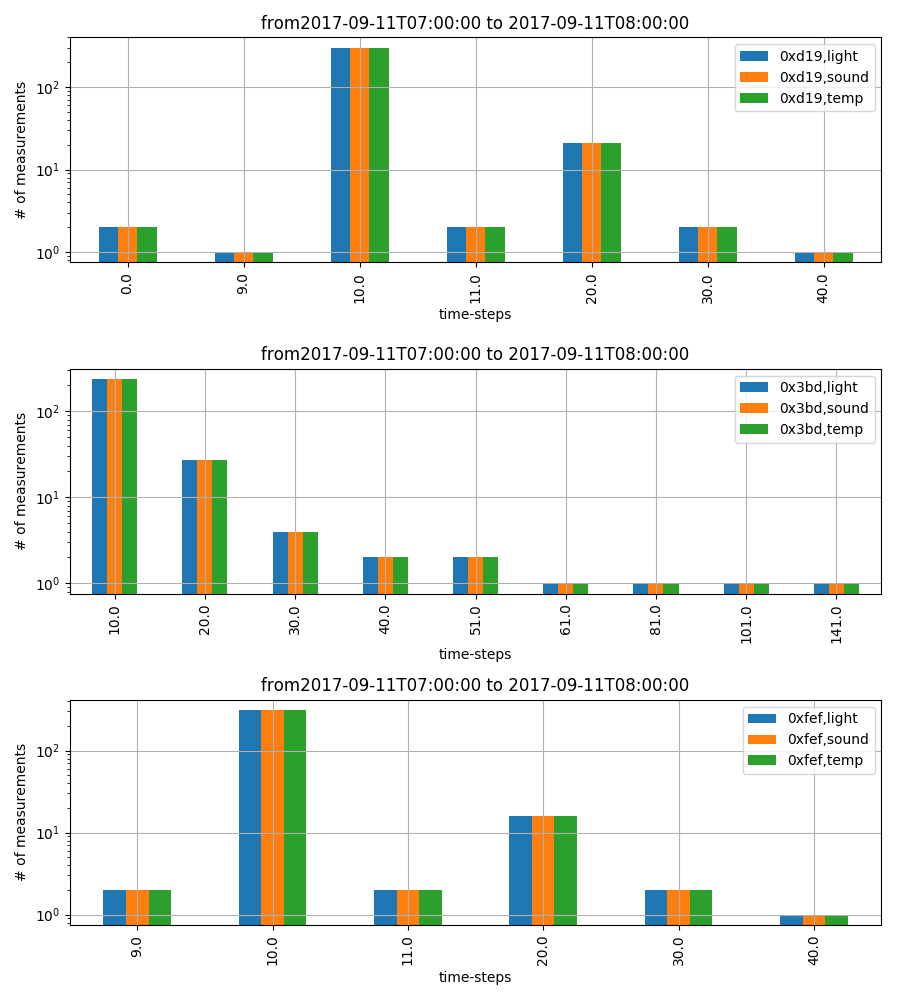

In [21]:
fts = datetime(year=2017, month=9, day=11, hour=8, minute=0)
lts = datetime(year=2017, month=9, day=11, hour=9, minute=0)

fts = np.datetime64('2017-09-11T07:00:00')
lts = np.datetime64('2017-09-11T08:00:00')

fig, axes = plt.subplots(nrows=3, ncols=1)
plot_bars(root, [t_path[2], s_path[2], l_path[2]], fts, lts, axes[0])
plot_bars(root, [t_path[0], s_path[0], l_path[0]], fts, lts, axes[1])
plot_bars(root, [t_path[1], s_path[1], l_path[1]], fts, lts, axes[2])
fig.tight_layout()
plt.show()

It is easy to see that sensors belonging to the same node have the same transmission rate for each time interval.